# Explore here

It's recommended to use this notebook for exploration purposes.

In [51]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
#import seaborn as sns



In [52]:
# URL of the web page to scrape
url = "https://ycharts.com/companies/TSLA/revenues"

# Add headers to the request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Get the HTML content of the page with headers
response = requests.get(url, headers = headers)
html_content = response.text
print(html_content)













<!doctype html>
<html lang="en" ng-jq>
    <head>
        <title>
        Tesla Revenue (Quarterly) Analysis | YCharts
        </title>

        <meta name="viewport" content="width=device-width, initial-scale=1.0" />
<!-- This code allows us to correctly display the page on mobile devices -->
<script defer>
    var viewport = document.querySelector('meta[name=viewport]');
    if (viewport) {
        var minWidth = 700;
        if (screen.width < minWidth) {
            document.head.removeChild(viewport);
            var newViewport = document.createElement('meta');
            newViewport.setAttribute('name', 'viewport');
            newViewport.setAttribute('content', 'width=' + minWidth);
            document.head.appendChild(newViewport);
        }
    }
</script>


        
        <script>
    if (navigator.userAgent.indexOf('Trident') !== -1 || navigator.userAgent.indexOf('MSIE') !== -1) {
        window.onload=function() {
            var ie_banner = document.createEl

In [53]:
# Parse the HTML content using BeautifulSoup
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

print(soup.prettify())  # Print the parsed HTML to verify the output

<!DOCTYPE html>
<html lang="en" ng-jq="">
 <head>
  <title>
   Tesla Revenue (Quarterly) Analysis | YCharts
  </title>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <!-- This code allows us to correctly display the page on mobile devices -->
  <script defer="">
   var viewport = document.querySelector('meta[name=viewport]');
    if (viewport) {
        var minWidth = 700;
        if (screen.width < minWidth) {
            document.head.removeChild(viewport);
            var newViewport = document.createElement('meta');
            newViewport.setAttribute('name', 'viewport');
            newViewport.setAttribute('content', 'width=' + minWidth);
            document.head.appendChild(newViewport);
        }
    }
  </script>
  <script>
   if (navigator.userAgent.indexOf('Trident') !== -1 || navigator.userAgent.indexOf('MSIE') !== -1) {
        window.onload=function() {
            var ie_banner = document.createElement('div');
            ie_banner.innerTex

In [54]:
# Find all tables on the page
tables = soup.find_all('table')
tables

[<table class="table">
 <thead>
 <tr>
 <th>Date</th>
 <th class="text-right">Value</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>June 30, 2024</td>
 <td class="text-right">
                             
                                 25.50B
                             
                         </td>
 </tr>
 <tr>
 <td>March 31, 2024</td>
 <td class="text-right">
                             
                                 21.30B
                             
                         </td>
 </tr>
 <tr>
 <td>December 31, 2023</td>
 <td class="text-right">
                             
                                 25.17B
                             
                         </td>
 </tr>
 <tr>
 <td>September 30, 2023</td>
 <td class="text-right">
                             
                                 23.35B
                             
                         </td>
 </tr>
 <tr>
 <td>June 30, 2023</td>
 <td class="text-right">
                             
                   

In [55]:
# Find the specific table containing the quarterly evolution

table = soup.find('table', {'class': 'table'})  

table


<table class="table">
<thead>
<tr>
<th>Date</th>
<th class="text-right">Value</th>
</tr>
</thead>
<tbody>
<tr>
<td>June 30, 2024</td>
<td class="text-right">
                            
                                25.50B
                            
                        </td>
</tr>
<tr>
<td>March 31, 2024</td>
<td class="text-right">
                            
                                21.30B
                            
                        </td>
</tr>
<tr>
<td>December 31, 2023</td>
<td class="text-right">
                            
                                25.17B
                            
                        </td>
</tr>
<tr>
<td>September 30, 2023</td>
<td class="text-right">
                            
                                23.35B
                            
                        </td>
</tr>
<tr>
<td>June 30, 2023</td>
<td class="text-right">
                            
                                24.93B
                        

In [56]:
rows = table.find_all('tr')
for row in rows:
    columns = row.find_all('td')
    for column in columns:
        print(column.text.strip())  # Extract and print the text from each column

June 30, 2024
25.50B
March 31, 2024
21.30B
December 31, 2023
25.17B
September 30, 2023
23.35B
June 30, 2023
24.93B
March 31, 2023
23.33B
December 31, 2022
24.32B
September 30, 2022
21.45B
June 30, 2022
16.93B
March 31, 2022
18.76B
December 31, 2021
17.72B
September 30, 2021
13.76B
June 30, 2021
11.96B
March 31, 2021
10.39B
December 31, 2020
10.74B
September 30, 2020
8.771B
June 30, 2020
6.036B
March 31, 2020
5.985B
December 31, 2019
7.384B
September 30, 2019
6.303B
June 30, 2019
6.35B
March 31, 2019
4.541B
December 31, 2018
7.226B
September 30, 2018
6.824B
June 30, 2018
4.002B


In [57]:
import pandas as pd

# converting the extracted table data to a DataFrame
data = []
rows = table.find_all('tr')
for row in rows:
    columns = row.find_all('td')
    data.append([column.text.strip() for column in columns])

# Create DataFrame
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])  # Update the column names based on your table structure
print(tesla_revenue.head())


                 Date Revenue
0                None    None
1       June 30, 2024  25.50B
2      March 31, 2024  21.30B
3   December 31, 2023  25.17B
4  September 30, 2023  23.35B


In [58]:
#process the dataframe

tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue.head()

,Date,Revenue
0,None,None
1,"June 30, 2024",25.50B
2,"March 31, 2024",21.30B
3,"December 31, 2023",25.17B
4,"September 30, 2023",23.35B


In [59]:
# Remove currency symbols and commas from 'Revenue' column
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,B]', '', regex=True).astype(float)
tesla_revenue

,Date,Revenue
0,None,NaN
1,"June 30, 2024",25.500
2,"March 31, 2024",21.300
3,"December 31, 2023",25.170
4,"September 30, 2023",23.350
5,"June 30, 2023",24.930
6,"March 31, 2023",23.330
7,"December 31, 2022",24.320
8,"September 30, 2022",21.450
9,"June 30, 2022",16.930


In [60]:
# Check for missing values
missing_values = tesla_revenue.isnull().sum()

# Display missing values for each column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Date       1
Revenue    1
dtype: int64


In [63]:
# Convert 'Date' column to datetime format
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'], errors='coerce')
df = tesla_revenue.dropna(subset=['Date'])

df

,Date,Revenue
1,2024-06-30,25.500
2,2024-03-31,21.300
3,2023-12-31,25.170
4,2023-09-30,23.350
5,2023-06-30,24.930
6,2023-03-31,23.330
7,2022-12-31,24.320
8,2022-09-30,21.450
9,2022-06-30,16.930
10,2022-03-31,18.760


In [64]:
# Reset index
df.reset_index(drop=True, inplace=True)

print(df.head())

        Date  Revenue
0 2024-06-30    25.50
1 2024-03-31    21.30
2 2023-12-31    25.17
3 2023-09-30    23.35
4 2023-06-30    24.93


In [65]:
import sqlite3

In [68]:
# Connect to SQLite database
conn = sqlite3.connect('tesla_revenue.db')
cursor = conn.cursor()

# Create a table
cursor.execute('''
CREATE TABLE IF NOT EXISTS quarterly_revenue (
    Date DATE,
    Revenue REAL
)
''')

# Insert data into the table
df.to_sql('quarterly_revenue', conn, if_exists='replace', index=False)

# Commit changes and close the connection
conn.commit()
conn.close()

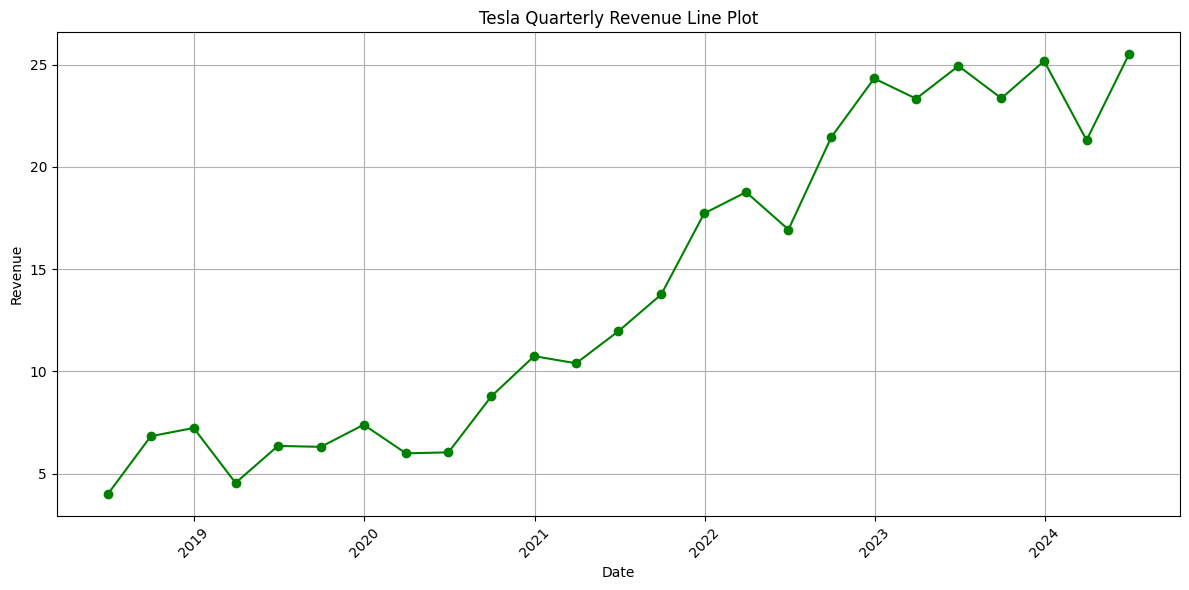

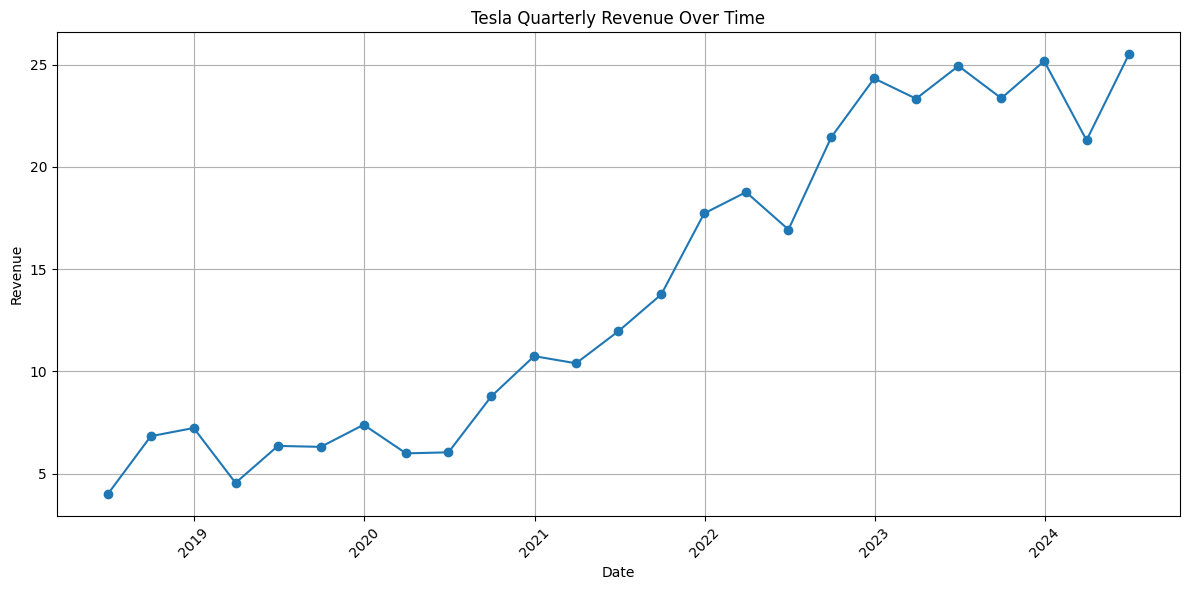

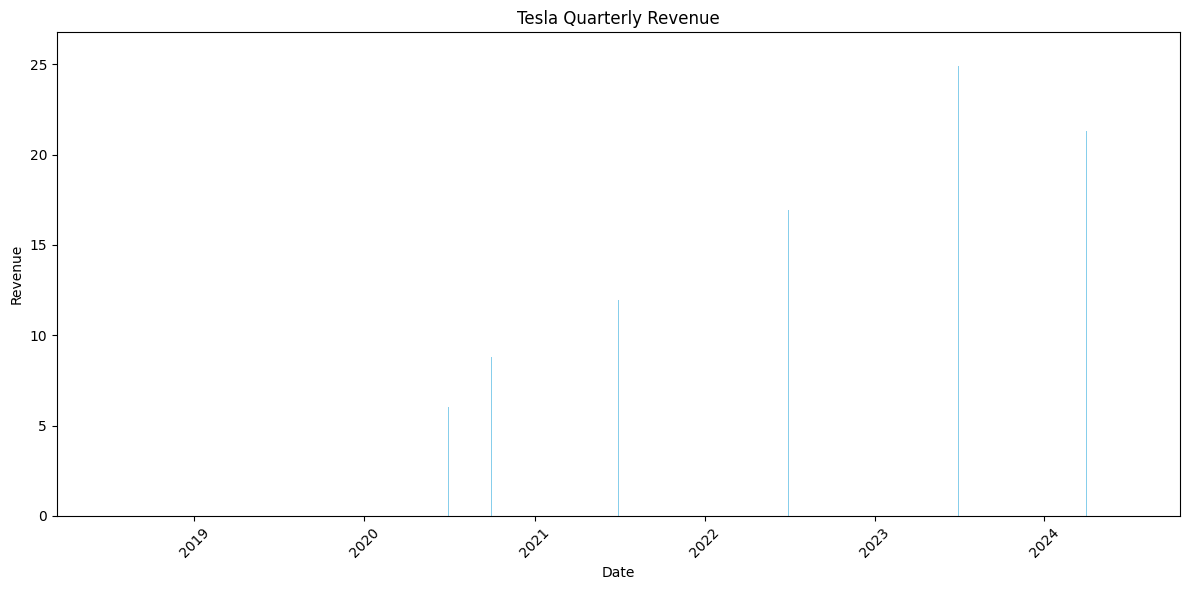

In [70]:
import matplotlib.pyplot as plt

# Line Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Revenue'], color='green', marker='o', linestyle='-')
plt.title('Tesla Quarterly Revenue Line Plot')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Revenue'], marker='o')
plt.title('Tesla Quarterly Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Revenue'], color='skyblue')
plt.title('Tesla Quarterly Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()